# Table of Contents
1. [Introduction](#Introduction)
2. [Importing Libraries](#Importing-Libraries)
3. [Loading the Dataset](#Loading-the-Dataset)
4. [Preprocessing](#Preprocessing)
5. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
6. [Modelling](#Modelling)
7. [Evaluation](#Evaluation)

## Introduction
The objective is to build Machine-Learning (Classification) models to identify Spam messages and assess the efficacy of our models using suitable metrics. We employ the Natural Language Processing (NPL) technique and vectorisation of our data to ensure it is in a suitable format for our algorithms.

## Importing Libraries
We import the useful libraries for our project including **Pandas** and **NumPy** for storing and processing the data, **sci-kit learn** for training and evaluating the Machine-Learning models, **Matlplotlib** for data visualisation, and **nltk** for Natural Language Processing (NLP).

In [3]:
# Importing libraries/modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Loading the Dataset
The dataset consists of two (useful) columns, the Class (spam or ham) and the content of the messages. We load the dataset into a Pandas data frame and apply some reformatting and renaming of attributes.

In [5]:
df = pd.read_csv("spam.csv", encoding="latin1") # dataset wasn't loading without the "encoding" argument
print(df.shape)
df.head()

(5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Removing unnecessary columns and renaming
df = df.iloc[:,0:2]
df = df.rename(columns = {"v1": "Class", "v2": "Message"})
print(df.shape)
df.head()

(5572, 2)


,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Preprocessing
1. Clean the data and standardise the text.
2. Natural Language Processing (NLP) using the nltk Python Library to remove "noise" from our data.

In [9]:
# Preprocessing
def preprocess_text(text):
    # Cleaning
    text = text.lower()
    text = re.sub(r"[^a-z\s]", '', text) # removing numbers and symbols
    # Breaking text into individual words
    words = word_tokenize(text)
    # Lemmatising words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(x) for x in words]
    # Putting it back together
    text = " ".join(words)
    return text

# Testing preprocessing
my_text = "Gimme a sec, I wanna watch the@ @@&Simpsons"
preprocess_text(my_text)

# Applying to dataset
df["Processed Message"] = df["Message"].apply(preprocess_text)
df.head(10)

,Class,Message,Processed Message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he go to usf he life around h...
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey there darling it been week now and...
6,ham,Even my brother is not like to speak with me. ...,even my brother is not like to speak with me t...
7,ham,As per your request 'Melle Melle (Oru Minnamin...,a per your request melle melle oru minnaminung...
8,spam,WINNER!! As a valued network customer you have...,winner a a valued network customer you have be...
9,spam,Had your mobile 11 months or more? U R entitle...,had your mobile month or more u r entitled to ...


## Exploratory Data Analysis (EDA)
We use generate word clouds to showcase the frequency of words in Ham vs Spam messages.

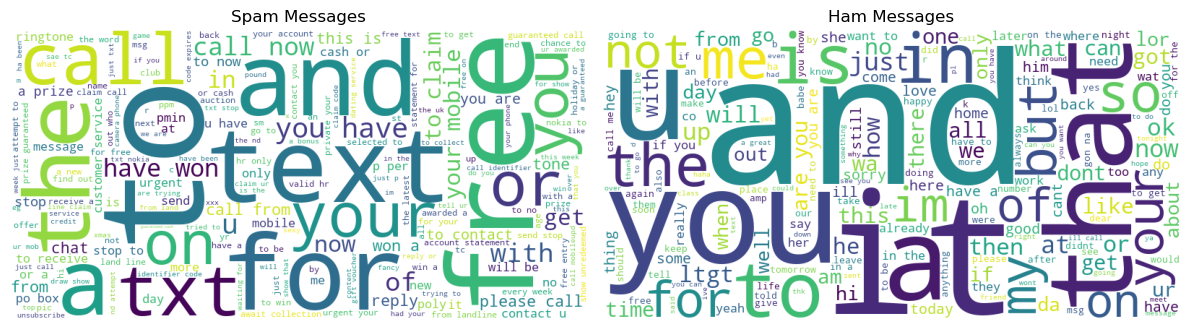

In [35]:
# Exploratory Data Analysis
from wordcloud import WordCloud
# Separating Spam and ham messages
spam_mss = df[df["Class"] == "spam"]["Processed Message"]
ham_mss = df[df["Class"] == "ham"]["Processed Message"]

# Combining all text in the same class together
spam = " ".join(spam_mss)
ham = " ".join(ham_mss)

# Generating word clouds
spam_wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords="english").generate(spam)
ham_wordcloud = WordCloud(width=800, height=400, background_color="white", stopwords="english").generate(ham)

# Visualisation
Mss = {"Spam Messages": spam_wordcloud, "Ham Messages": ham_wordcloud}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for i, (key, value) in enumerate(Mss.items()):
    ax = axes[i]
    ax.imshow(value)
    ax.set_title(key)
    ax.axis("off")

#plt.suptitle("Word Frequency", fontsize=16)
plt.tight_layout()
plt.show()

## Modelling
We use the following Classification techniques from the sci-kit learn Python Library:
1. Logistic Regression
2. Support Vector Machine (SVM)

Prior to that, we vectorise the data so it is suitable for training and testing using the Train/Test split method.

In [77]:
# Vectorising and labelling independent and dependent variables
vectoriser = TfidfVectorizer(stop_words="english")
X = vectoriser.fit_transform(df["Processed Message"]).toarray()
y = preprocessing.LabelEncoder().fit_transform(df["Class"])
print(X)
y[0:10] # checking y values match

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [117]:
# Modelling
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# Applying the classification models
algorithms = {"Logistic Regression": LogisticRegression(), "Support Vector Machine": SVC()}
for i in algorithms.values():
    i.fit(X_train, y_train)

## Evaluation
We use the following metrics to evaluate our models:
1. Classification Report - Precision, Recall and F1-Score for both classes. Overall Accuracy.
2. Confusion Matrix - Displaying the True/False positives and True/False negatives

In [169]:
# Classification report
print(f"{'='*20}Classification Reports{'='*20}\n")
classes = ["ham", "spam"]
for key, value in algorithms.items():
    # Predictions on test set
    yhat = value.predict(X_test)
    report = classification_report(y_test, yhat, target_names=classes)
    print(f"\n{key}")
    print(report)

====================Classification Reports====================


Logistic Regression
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       941
        spam       1.00      0.70      0.82       174

    accuracy                           0.95      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.95      0.95      1115


Support Vector Machine
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       941
        spam       1.00      0.81      0.90       174

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



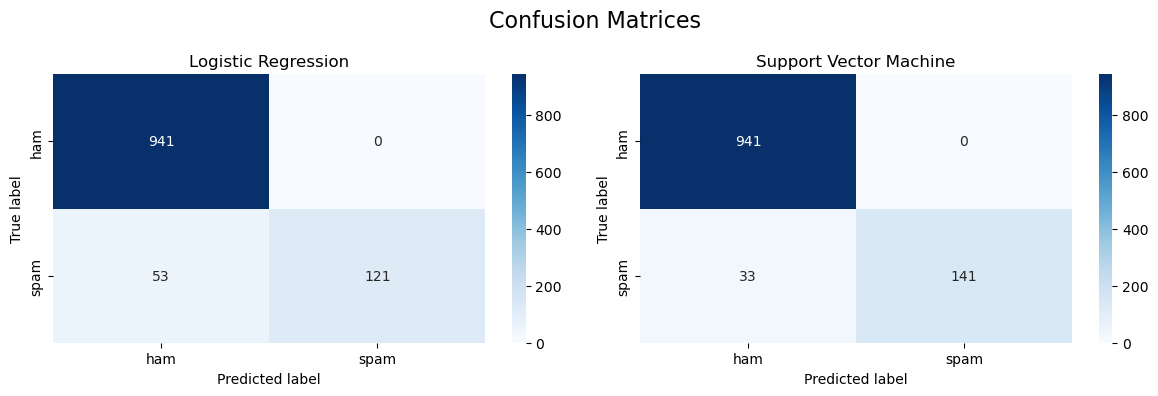

In [177]:
# Confusion matrix
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i, (key, value) in enumerate(algorithms.items()):
    yhat = value.predict(X_test)
    cm = confusion_matrix(y_test, yhat)
# Visualisation
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=classes, yticklabels=classes)
    ax.set_title(key)
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")

plt.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout()
plt.show()